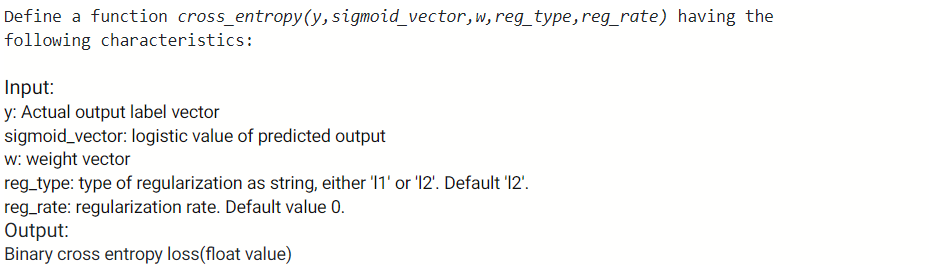

In [1]:
import numpy as np
def cross_entropy(y,sigmoid_vector,w,reg_type='l2',reg_rate=0):
	loss_orig = -1 * np.sum(y * np.log(sigmoid_vector) + (1 - y) * np.log(1 - sigmoid_vector))
	if reg_type == "l2":
		reg = reg_rate * np.dot(w.T, w)
	else:
		reg = reg_rate * np.sum(abs(w))
	return loss_orig + reg

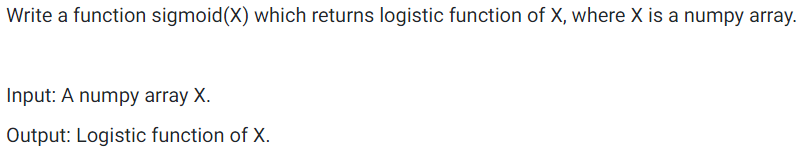

In [2]:
import numpy as np
def sigmoid(X):
    sig = 1/(1+np.exp(-X))
    return sig

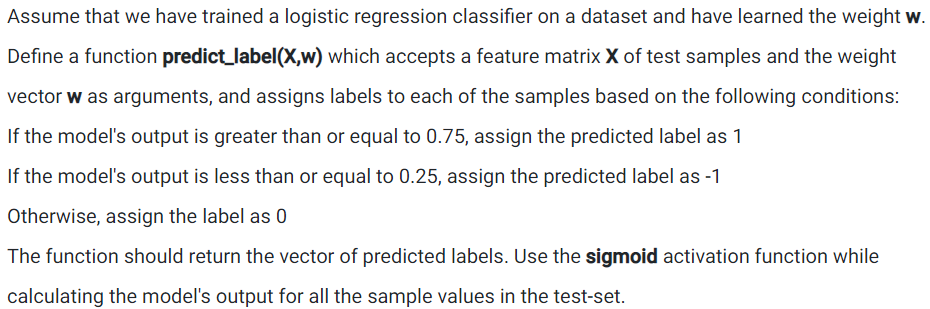

In [3]:
import numpy as np
def linear_combination(X, w):
    return X @ w
	
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
	
def activation(X, w):
    return sigmoid(linear_combination(X, w))
	
def predict_label(X, w):
    labels = np.where(activation(X, w) >= 0.75, 1, np.where(activation(X, w) <= 0.25, -1, 0))
    return labels

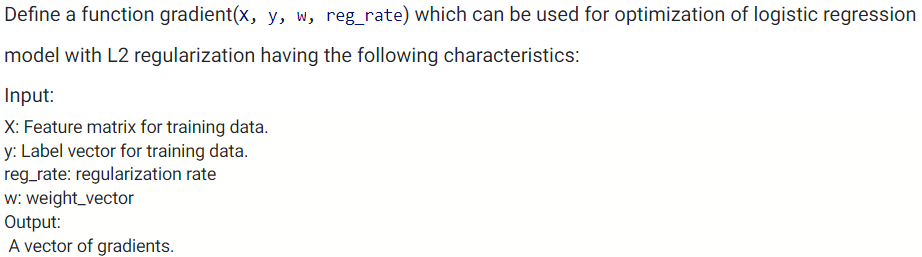

In [4]:
import numpy as np
def gradient(X,y,w,reg_rate):
    sigmoid_vector = 1 / (1 + np.exp(-X@w))
    G = X.T @ (sigmoid_vector - y) + reg_rate * w
    return G

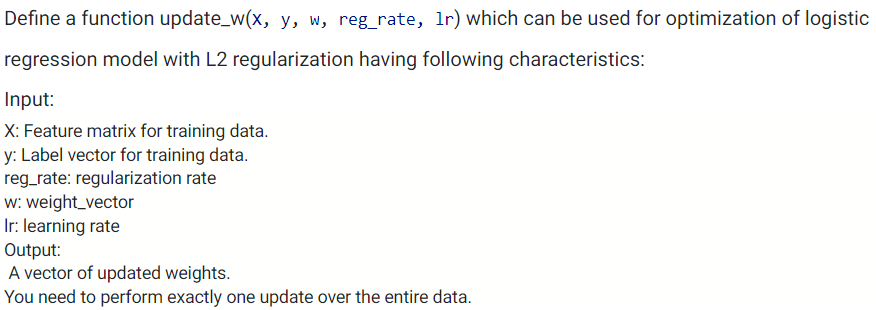

In [5]:
import numpy as np
def calculate_gradient(X, y, w, reg_rate):
    sigmoid_vector = 1 / (1 + np.exp(-X@w))
    return X.T @ (sigmoid_vector - y) + reg_rate * w
	
def update_w(X, y, w, reg_rate, lr):
    return w - calculate_gradient(X, y, w, reg_rate) * lr

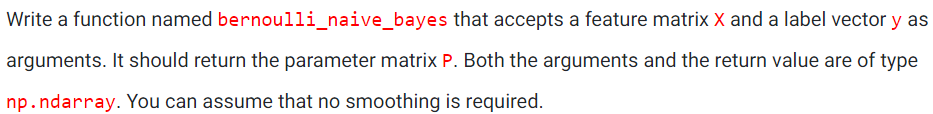

In [6]:
import numpy as np
def bernoulli_naive_bayes(X, y):
    _classes = np.unique(y)
    n_classes = len(np.unique(y))
    n_samples, n_features = X.shape
    p = np.zeros((n_classes, n_features))
    
    for c in _classes:
        X_c = X[y == c]
        p[c-1, : ] = (np.sum(X_c, axis=0))/(X_c.shape[0])
        
    
    return p.T

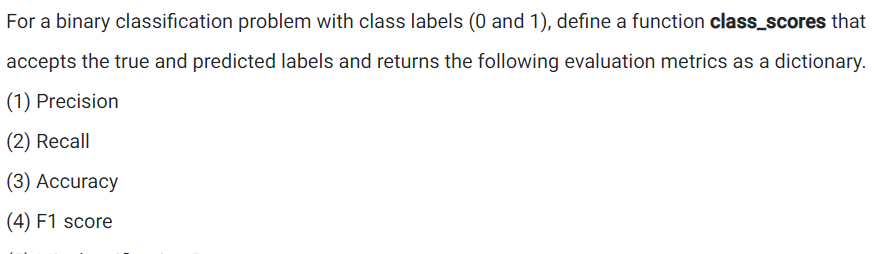

In [7]:
import numpy as np
def class_scores (y_test, y_pred) :
    tp = np.where((y_test == 1) & (y_pred == 1), 1, 0).sum()
    tn = np.where((y_test == 0) & (y_pred == 0), 1, 0).sum()
    fp = np.where((y_test == 0) & (y_pred == 1), 1, 0).sum()
    fn = np.where((y_test == 1) & (y_pred == 0), 1, 0).sum()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    f1_score = 2 * ((precision * recall) / (precision + recall))
    misclassification_rate = 1 - accuracy
    return {"precision": precision, "recall": recall, "accuracy": accuracy,
           "f1_score": f1_score, "misclassification_rate": misclassification_rate}

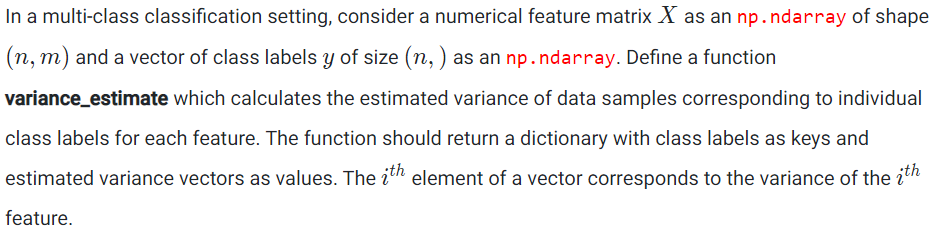

In [8]:
import numpy as np
def variance_estimate(X: np.ndarray,  y: np.ndarray):
    D = {}
    labels = np.unique(y)
    for label in labels:
        D[label] = np.var(X[y == label], axis = 0)
    return D

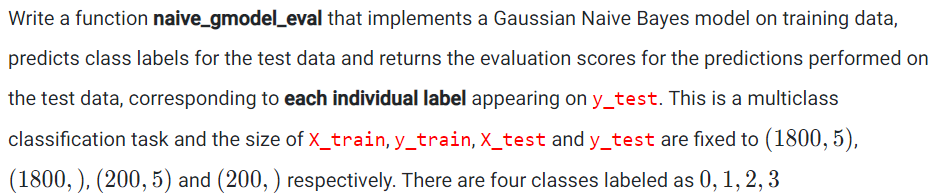

In [9]:
import numpy as np
def class_scores(y_test, y_pred, positive):
    tp = np.sum((y_test == positive) & (y_pred == positive))
    tn = np.sum((y_test != positive) & (y_pred != positive))
    fp = np.sum((y_test != positive) & (y_pred == positive))
    fn = np.sum((y_test == positive) & (y_pred != positive))

    names = ("Precision", "Recall","Accuracy", "Misclassification Rate","F1 score")
    values = [tp / (tp + fp), tp / (tp + fn), (tp + tn) / (tp + tn + fp + fn)]
    values.append(1 - values[-1])
    values.append(2 * values[0] * values[1] / (values[0] + values[1]))

    scores = dict(zip(names,values))
    return scores

# Solution
class NB(object):

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype = np.float64)
        self._var = np.zeros((n_classes, n_features), dtype = np.float64)
        self._priors = np.zeros(n_classes, dtype = np.float64)

        for c in self._classes:
            X_c = X[y == c]
            self._mean[c, :] = X_c.mean(axis = 0)
            self._var[c, :] = X_c.var(axis = 0)
            self._priors[c] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        self._posterior = np.zeros((X.shape[0], len(self._classes)), dtype = np.float64)
        for idx, x in enumerate(X):
            for c in self._classes:
                self._posterior[idx, c] = np.log(self._pdf(c, x)) + np.log(self._priors[c])
        return np.argmax(self._posterior, axis = 1)

    def _pdf(self, class_idx, X):
        mean = self._mean[class_idx]
        var = np.diag(self._var[class_idx])
        z = np.power(2 * np.pi, X.shape[0]/2) * np.power(np.linalg.det(var), 1/2)
        return (1 / z) * np.exp(-(1 / 2) * (X - mean).T @ (np.linalg.inv(var)) @ (X - mean))

def naive_gmodel_eval(X_train, y_train, X_test, y_test):
    gaussian_nb = NB()
    gaussian_nb.fit(X_train, y_train)
    y_pred = gaussian_nb.predict(X_test)

    labels = np.unique(y_train)
    D = {}
    for label in labels:
        D[label] = class_scores(y_test, y_pred, label)
    return D

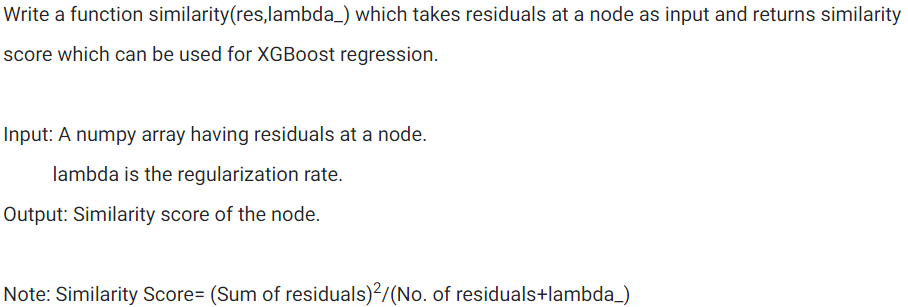

In [10]:
import numpy as np
def similarity(res,lambda_):
    return np.sum(res) ** 2 / (len(res) + lambda_)

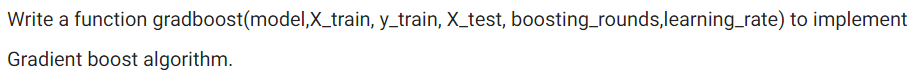

In [11]:
import numpy as np
import pandas as pd
def gradboost(model, X_train, y_train, X_test, boosting_rounds, learning_rate=0.1):
    y_hat_train = np.repeat(np.mean(y_train), len(y_train))
    y_hat_test = np.repeat(np.mean(y_train), len(X_test))
    
    residuals = y_train - y_hat_train
    
    for i in range(boosting_rounds):
        model = model.fit(X_train, residuals)
        y_hat_train += learning_rate * model.predict(X_train)
        y_hat_test += learning_rate * model.predict(X_test)
        residuals = y_train - y_hat_train
    return y_hat_train, y_hat_test

Above code when submitted gives error 'squared error'.  This is because of the mismatch in the scikit-learn version.  See https://discourse.onlinedegree.iitm.ac.in/t/while-trying-to-fit-into-decisiontreeregressor-i-get-keyerror-squared-error/37509/6 for more details

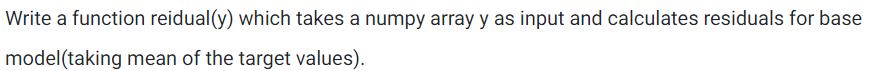

In [12]:
import numpy as np
def residual(y):
  y_hat= np.repeat(np.mean(y), len(y))
  res=y-y_hat
  return res

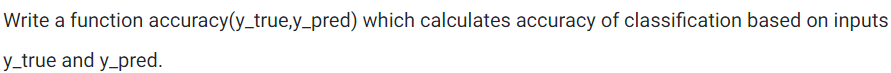

In [13]:
import numpy as np
def accuracy(y_true,y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

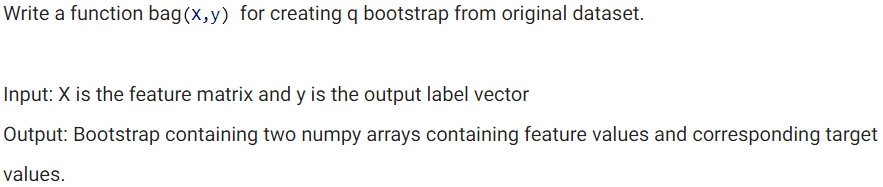

In [14]:
import numpy as np
def bag(X,y):
  n_samples = X.shape[0]
  np.random.seed(42)
  indices = np.random.choice(n_samples, size = n_samples, replace=True)
  return X[indices], y[indices]